<a href="https://colab.research.google.com/github/DolapoSalim/filadentification/blob/main/filadentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import requests
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import pyplot as plt


<ipython-input-1-79d95aa0a628>:5: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
os.getcwd()

'/content'

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Navigate to images folder
# Copy all images to /content/img/cap
!cp -r '/content/drive/MyDrive/img file/cap' '/content/data/img'

In [10]:
image_folder = '/content/data/img/cap'
images = os.listdir(image_folder)
print(images)

['images (224).jpeg', 'images (28).jpeg', 'images (261).jpeg', 'prestigeapplause.com', 'images (221).jpeg', 'YV5RW3WC-large.jpg', 'images (177).jpeg', 'images (81).jpeg', 'NY93MV3W-large.jpg', 'images (51).jpeg', 'images (271).jpeg', 'images (241).jpeg', 'images (172).jpeg', 'images (109).jpeg', 'images (197).jpeg', 'images (164).jpeg', 'images (259).jpeg', 'image (15).jpeg', 'images (47).jpeg', 'images (40).jpeg', 'images (65).jpeg', 'images (8).jpeg', 'images (233).jpeg', 'images (39).jpeg', 'images (147).jpeg', 'images (219).jpeg', 'images (19).jpeg', 'il_fullxfull-5494689250_fk4l.jpg', 'images (185).jpeg', 'images (66).jpeg', 'images (141).jpeg', 'images (265).jpeg', 'images (242).jpeg', 'images (23).jpeg', 'images (207).jpeg', 'images (91).jpeg', 'images (272).jpeg', 'images (11).jpeg', 'images (193).jpeg', 'images (186).jpeg', 'images (67).jpeg', 'images (79).jpeg', 'images.jpeg', 'images (204).jpeg', 'images (88).jpeg', 'images (52).jpeg', 'images (187).jpeg', 'images (181).jpeg

In [11]:
cap_dir = image_folder

In [12]:
# to delete unwanted files in the directory

for image in os.listdir(cap_dir):
    if image.lower().endswith(".jpg"):
        print(f"image: {image} is in the right format")
    elif image.lower().endswith(".jpeg"):
        print(f"image: {image} is in the right format")
    elif image.lower().endswith(".png"):
        print(f"image: {image} is in the right format")
    else:
        os.remove(os.path.join(cap_dir, image))
        print(f"deleted non jpg image: {image}")

print(f"cleaning completed with {len(os.listdir(cap_dir))} images left in directory")

image: images (224).jpeg is in the right format
image: images (28).jpeg is in the right format
image: images (261).jpeg is in the right format
deleted non jpg image: prestigeapplause.com
image: images (221).jpeg is in the right format
image: YV5RW3WC-large.jpg is in the right format
image: images (177).jpeg is in the right format
image: images (81).jpeg is in the right format
image: NY93MV3W-large.jpg is in the right format
image: images (51).jpeg is in the right format
image: images (271).jpeg is in the right format
image: images (241).jpeg is in the right format
image: images (172).jpeg is in the right format
image: images (109).jpeg is in the right format
image: images (197).jpeg is in the right format
image: images (164).jpeg is in the right format
image: images (259).jpeg is in the right format
image: image (15).jpeg is in the right format
image: images (47).jpeg is in the right format
image: images (40).jpeg is in the right format
image: images (65).jpeg is in the right format
im

In [13]:
img_folder = cap_dir
print(f"img_folder: {img_folder}")

img_folder: /content/data/img/cap


In [18]:
#remove images with size less than 10KB
for image in os.listdir(img_folder):
    path = f"{img_folder}/{image}"
    if os.path.isfile(path) and os.path.getsize(path) <= 5 * 1024:
        os.remove(path)

print(f"All images with size less than 10KB is have been deleted.")

All images with size less than 10KB is have been deleted.


In [19]:
# Get a sorted list

image_files = sorted([f for f in os.listdir(img_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# Loop and rename
for i, filename in enumerate(image_files):
    ext = os.path.splitext(filename)[1]
    new_name = f"img_{i}{ext}"
    new_path = os.path.join(img_folder, new_name)

    # Skip if target filename already exists
    if os.path.exists(new_path):
        print(f"Skipping {filename}, {new_name} already exists.")
        continue

    os.rename(os.path.join(img_folder, filename), new_path)

print("Safe renaming complete.")

Safe renaming complete.


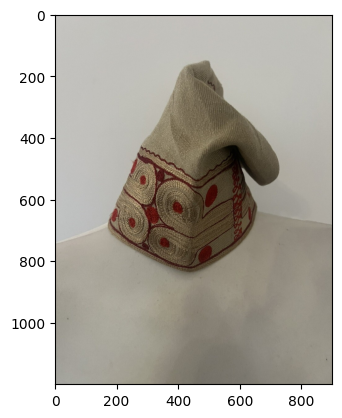

In [23]:
all_images = [f for f in os.listdir(img_folder)
              if os.path.isfile(os.path.join(img_folder, f))]
#BGR - RGB
random_image = random.choice(all_images)
img = cv2.imread(os.path.join(img_folder, random_image))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [24]:
img_rgb.shape

(1200, 900, 3)

In [28]:
# API data scraping

PEXELS_API_KEY = "yCtTzajV7WFqv0CLDHS9FVX7BBBZfavUW44QXXKhQSF8kbRd80e8TXzE"
save_dir = "/content/data/img/no-cap"
os.makedirs(save_dir, exist_ok=True)

queries = [
    "nature landscape", "office people", "technology", "home interior",
    "street photography", "animals", "kitchen", "library",
    "people walking", "parks and city"
]

headers = {
    "Authorization": PEXELS_API_KEY
}

count = 0

while count < 236:
    query = random.choice(queries)
    page = random.randint(1, 5)  # Randomize page between 1 and 5 to avoid empty results
    print(f"Fetching images for query: {query} (Page {page})")

    response = requests.get(
        "https://api.pexels.com/v1/search",
        headers=headers,
        params={"query": query, "per_page": 30, "page": page}
    )

    if response.status_code != 200:
        print(f"Failed to fetch images: {response.status_code}")
        continue

    data = response.json()
    photos = data.get("photos", [])
    if not photos:
        print("No photos found, trying a different query...")
        continue

    for photo in photos:
        img_url = photo["src"]["medium"]
        try:
            img_data = requests.get(img_url).content
            with open(os.path.join(save_dir, f"no_cap_{count}.jpg"), "wb") as f:
                f.write(img_data)
            count += 1
            if count >= 236:
                break
        except Exception as e:
            print(f"Error downloading image: {e}")

print(f"Downloaded {count} no-cap images to: {save_dir}")

Fetching images for query: technology (Page 2)
Fetching images for query: animals (Page 2)
Fetching images for query: nature landscape (Page 2)
Fetching images for query: street photography (Page 5)
Fetching images for query: people walking (Page 5)
Fetching images for query: nature landscape (Page 1)
Fetching images for query: library (Page 5)
Fetching images for query: library (Page 2)
Downloaded 236 no-cap images to: /content/data/img/no-cap


In [49]:
data_dir = r"/content/data/img"
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32, image_size=(256, 256), shuffle=True)

Found 522 files belonging to 2 classes.


In [50]:
data_iterator = data.as_numpy_iterator() #Loop through the dataset

In [51]:
batch = data_iterator.next() #Access batch of data

In [52]:
batch

(array([[[[ 56.183594 ,  42.183594 ,  39.183594 ],
          [ 56.183594 ,  42.183594 ,  39.183594 ],
          [ 56.183594 ,  42.183594 ,  39.183594 ],
          ...,
          [ 55.322395 ,  40.322395 ,  35.322395 ],
          [ 54.183594 ,  39.183594 ,  34.183594 ],
          [ 54.183594 ,  39.183594 ,  34.183594 ]],
 
         [[ 57.       ,  43.55078  ,  38.898438 ],
          [ 57.       ,  43.55078  ,  38.898438 ],
          [ 57.       ,  43.55078  ,  38.898438 ],
          ...,
          [ 56.933983 ,  40.83242  ,  34.730858 ],
          [ 56.652344 ,  40.55078  ,  34.44922  ],
          [ 56.652344 ,  40.55078  ,  34.44922  ]],
 
         [[ 57.       ,  44.       ,  38.       ],
          [ 57.       ,  44.       ,  38.       ],
          [ 57.       ,  44.       ,  38.       ],
          ...,
          [ 58.342445 ,  41.342445 ,  34.342445 ],
          [ 58.91797  ,  41.91797  ,  34.91797  ],
          [ 58.91797  ,  41.91797  ,  34.91797  ]],
 
         ...,
 
         [[1

In [53]:
len(batch)

2

In [54]:
batch[0]

array([[[[ 56.183594 ,  42.183594 ,  39.183594 ],
         [ 56.183594 ,  42.183594 ,  39.183594 ],
         [ 56.183594 ,  42.183594 ,  39.183594 ],
         ...,
         [ 55.322395 ,  40.322395 ,  35.322395 ],
         [ 54.183594 ,  39.183594 ,  34.183594 ],
         [ 54.183594 ,  39.183594 ,  34.183594 ]],

        [[ 57.       ,  43.55078  ,  38.898438 ],
         [ 57.       ,  43.55078  ,  38.898438 ],
         [ 57.       ,  43.55078  ,  38.898438 ],
         ...,
         [ 56.933983 ,  40.83242  ,  34.730858 ],
         [ 56.652344 ,  40.55078  ,  34.44922  ],
         [ 56.652344 ,  40.55078  ,  34.44922  ]],

        [[ 57.       ,  44.       ,  38.       ],
         [ 57.       ,  44.       ,  38.       ],
         [ 57.       ,  44.       ,  38.       ],
         ...,
         [ 58.342445 ,  41.342445 ,  34.342445 ],
         [ 58.91797  ,  41.91797  ,  34.91797  ],
         [ 58.91797  ,  41.91797  ,  34.91797  ]],

        ...,

        [[118.91797  ,  85.91797  ,  7

In [55]:
# Get another batch from the iterator
batch = data_iterator.next()

In [56]:
# images in numpy array
batch[0].shape

(32, 256, 256, 3)

In [57]:
batch[1] # labels in numpy array

# class 0 = cap
# class 1 = no-cap

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

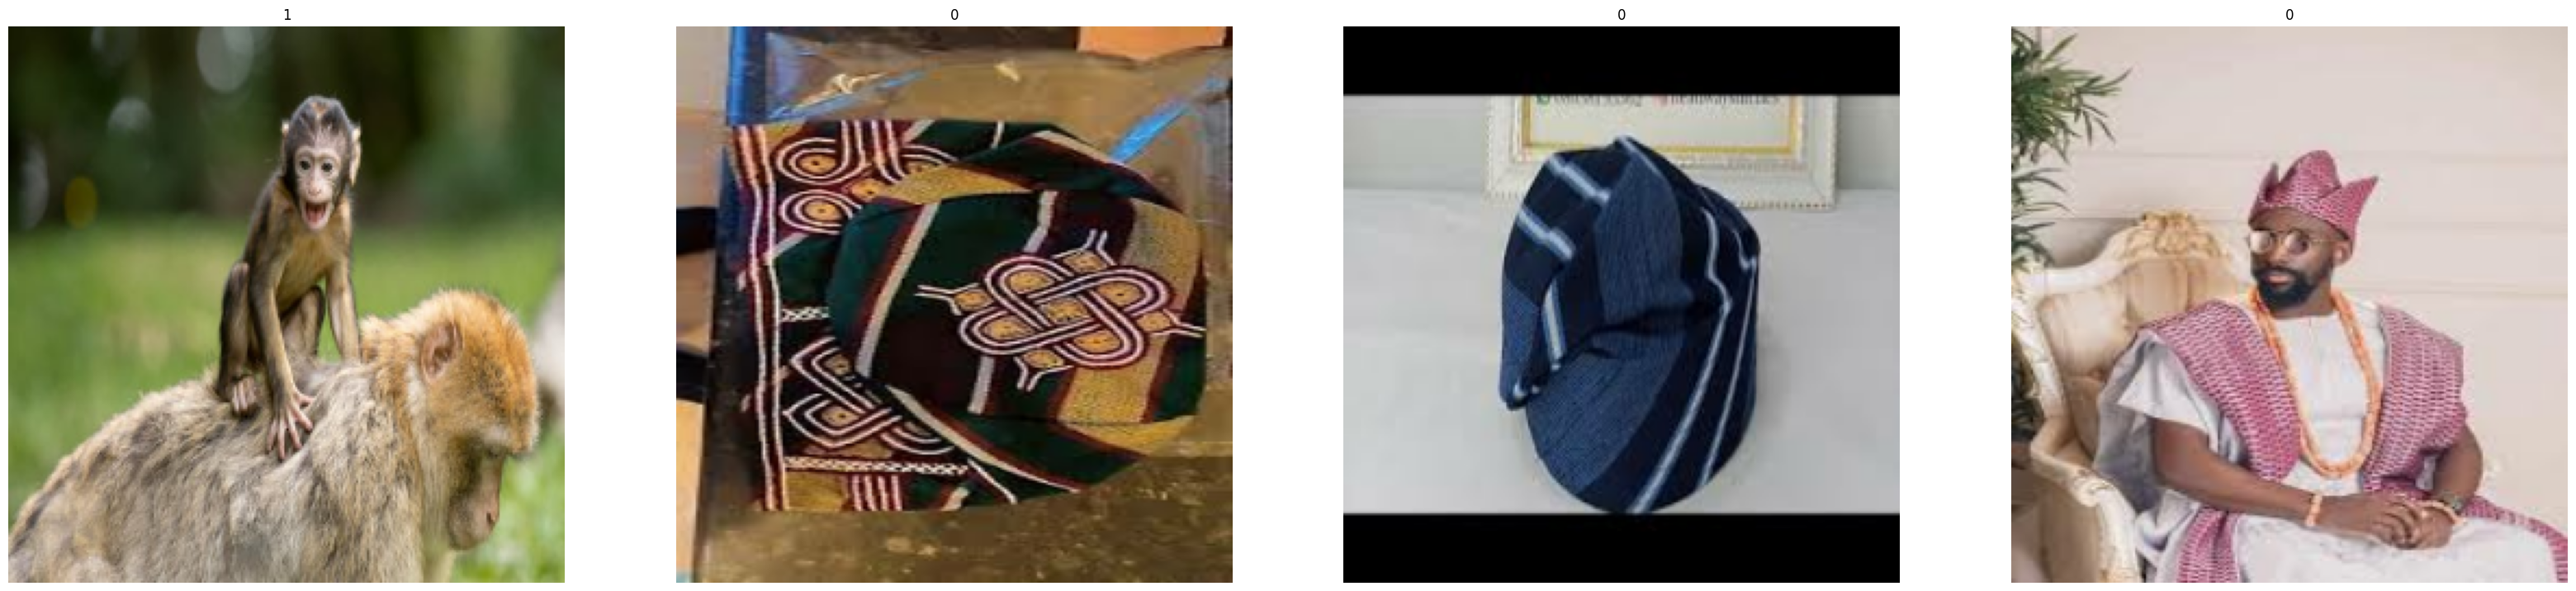

In [58]:
# Visualise some data/images
fig, ax = plt.subplots(ncols=4, figsize=(40, 40))
for i in range(4):
    ax[i].imshow(batch[0][i].astype("uint8"))
    ax[i].set_title(batch[1][i])
    ax[i].axis("off")

In [59]:
scaled_batch = batch[0] / 255.0
scaled_batch.max()

np.float32(1.0)

In [60]:
data = data.map(lambda x, y: (x / 255.0, y))
# x are images, y are labels

In [61]:
data.as_numpy_iterator().next()[0].min()

np.float32(0.0)

In [62]:
len(data) # 66 batches of 8 images each

17

In [63]:
17*.1

1.7000000000000002

In [66]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) +1
test_size = int(len(data) * 0.1)+1

In [67]:
train_size + val_size + test_size

17

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [70]:
len(train), len(val), len(test)

(11, 4, 2)

In [71]:
# Prefetch for performance
train = train.prefetch(buffer_size=tf.data.AUTOTUNE)
val = val.prefetch(buffer_size=tf.data.AUTOTUNE)

In [72]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [79]:
model = Sequential([
    Input(shape=(256, 256, 3)),  # Define input shape here
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [80]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [82]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Train the model
history = model.fit(
    train,
    validation_data=val,
    epochs=20
)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.5528 - loss: 0.7477 - val_accuracy: 0.7031 - val_loss: 0.6478
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.6979 - loss: 0.6168 - val_accuracy: 0.7969 - val_loss: 0.4333
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.7897 - loss: 0.4845 - val_accuracy: 0.8203 - val_loss: 0.4180
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 0.8234 - loss: 0.4178 - val_accuracy: 0.8125 - val_loss: 0.3617
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.8803 - loss: 0.2786 - val_accuracy: 0.8984 - val_loss: 0.2685
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.8975 - loss: 0.2404 - val_accuracy: 0.9141 - val_loss: 0.2040
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 0.9402 - loss: 0.2046 - val_accuracy: 0.9688 - val_loss: 0.1237
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.9664 - loss: 0.1266 - val_accuracy: 0.

In [85]:
history.history

{'accuracy': [0.5369318127632141,
  0.7215909361839294,
  0.7585227489471436,
  0.8181818127632141,
  0.8693181872367859,
  0.8920454382896423,
  0.9289772510528564,
  0.9573863744735718,
  0.9744318127632141,
  0.9715909361839294,
  0.9886363744735718,
  0.9772727489471436,
  1.0,
  0.9914772510528564,
  0.9943181872367859,
  1.0,
  0.9971590638160706,
  1.0,
  0.9971590638160706,
  0.9971590638160706],
 'loss': [0.7196319103240967,
  0.5905030965805054,
  0.513235330581665,
  0.4015820324420929,
  0.28736889362335205,
  0.25729691982269287,
  0.20783542096614838,
  0.1318032592535019,
  0.07872620224952698,
  0.08436231315135956,
  0.049613382667303085,
  0.055166807025671005,
  0.03365418314933777,
  0.02700820006430149,
  0.01951177977025509,
  0.015290701761841774,
  0.017506128177046776,
  0.014733299612998962,
  0.010041752830147743,
  0.009588739834725857],
 'val_accuracy': [0.703125,
  0.796875,
  0.8203125,
  0.8125,
  0.8984375,
  0.9140625,
  0.96875,
  0.9609375,
  0.98437

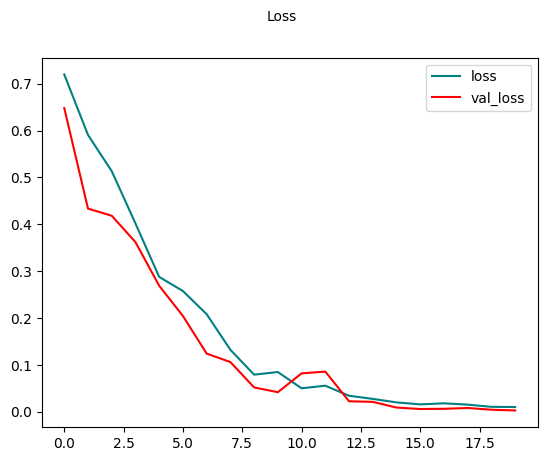

In [88]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=10)
plt.legend(loc="upper right")
plt.show();

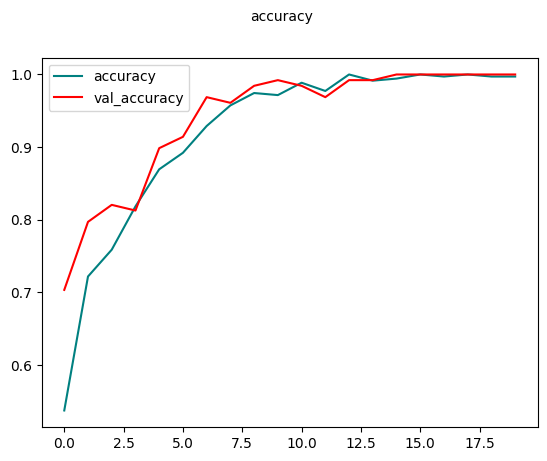

In [90]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('accuracy', fontsize=10)
plt.legend(loc="upper left")
plt.show();

### EVALUATION

In [91]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [92]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [93]:
len(test)

2

In [94]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


In [95]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


### TEST

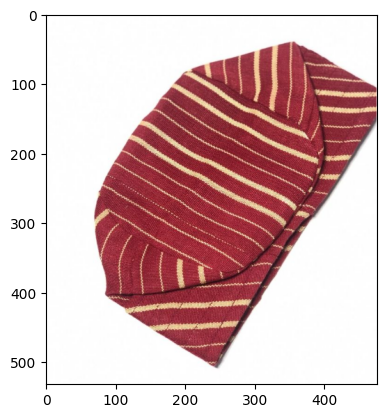

In [102]:
img = cv2.imread('/content/data/test-img.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

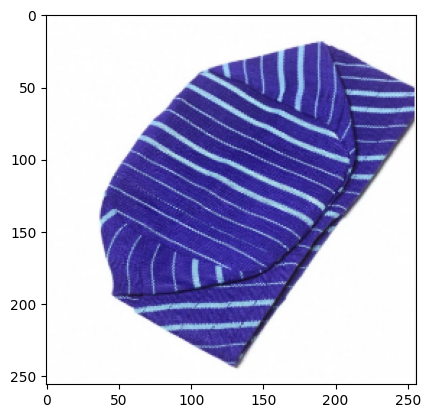

In [109]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
resize.shape

TensorShape([256, 256, 3])

In [110]:
np.expand_dims(resize/255, 0)

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.95686275, 0.9529412 , 0.94509804]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.95686275, 0.9529412 , 0.94509804]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         [0.95686275, 0.9529412 , 0.94509804]],

        ...,

        [[0.99607843, 0.99607843, 0.99607843],
         [0.997235  , 0.997235  , 0.997235  ]

In [113]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


In [114]:
yhat

array([[6.770677e-08]], dtype=float32)

In [115]:
if yhat > 0.5:
  print(f"Predicted class is NO-CAP")
else:
  print(f"Predicted class is CAP")


Predicted class is CAP


In [116]:
### Save Model
from tensorflow.keras.models import load_model

In [117]:
model.save(os.path.join('/content/models', 'filadentification.h5')) #h5 is a serialisation format

In [118]:
new_model = load_model(os.path.join('/content/models', 'filadentification.h5'))

In [122]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [123]:
if yhatnew > 0.5:
  print(f"Predicted class is NO-CAP")
else:
  print(f"Predicted class is CAP")


Predicted class is CAP
